# Day_010

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline # 內嵌繪圖，並且可以省略掉 plt.show()

In [2]:
# 設定 data_path
dir_data = 'D:/Coding Project/GitHub/ML100-Days/data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

In [3]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1

In [4]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

In [5]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

### 相關係數
pandas 很貼心地讓我們可以非常容易計算相關係數

In [6]:
app_train.corr()['TARGET']

SK_ID_CURR                                 -0.002108
TARGET                                      1.000000
NAME_CONTRACT_TYPE                         -0.030896
FLAG_OWN_CAR                               -0.021851
FLAG_OWN_REALTY                            -0.006148
CNT_CHILDREN                                0.019187
AMT_INCOME_TOTAL                           -0.003982
AMT_CREDIT                                 -0.030369
AMT_ANNUITY                                -0.012817
AMT_GOODS_PRICE                            -0.039645
REGION_POPULATION_RELATIVE                 -0.037227
DAYS_BIRTH                                 -0.078239
DAYS_EMPLOYED                               0.074958
DAYS_REGISTRATION                           0.041975
DAYS_ID_PUBLISH                             0.051457
OWN_CAR_AGE                                 0.037612
FLAG_MOBIL                                  0.000534
FLAG_EMP_PHONE                              0.045982
FLAG_WORK_PHONE                             0.

### 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [7]:
columns = app_train.columns
corr_Target = pd.DataFrame(columns = ['Columns', 'Target'])

for i in range(len(columns)):
    corr_Target.loc[i] = [columns[i], app_train['TARGET'].corr(app_train[columns[i]])]

In [8]:
max_15 = corr_Target.sort_values(by = 'Target', ascending = False).head(15)
min_15 =corr_Target.sort_values(by = 'Target', ascending = False).tail(15)
pd.concat([max_15, min_15], axis = 1)

,Columns,Target,Columns,Target
1,TARGET,1.000000,NaN,NaN
9,NaN,NaN,AMT_GOODS_PRICE,-0.039645
11,NaN,NaN,DAYS_BIRTH,-0.078239
12,DAYS_EMPLOYED,0.074958,NaN,NaN
13,DAYS_REGISTRATION,0.041975,NaN,NaN
14,DAYS_ID_PUBLISH,0.051457,NaN,NaN
17,FLAG_EMP_PHONE,0.045982,NaN,NaN
23,REGION_RATING_CLIENT,0.058899,NaN,NaN
24,REGION_RATING_CLIENT_W_CITY,0.060893,NaN,NaN
29,REG_CITY_NOT_LIVE_CITY,0.044395,NaN,NaN


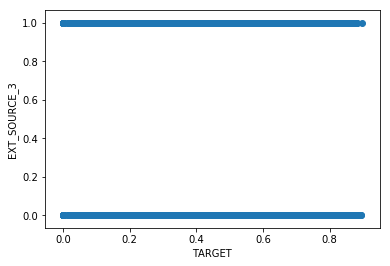

In [9]:
plt.scatter(app_train['EXT_SOURCE_3'], app_train['TARGET'])
plt.xlabel('TARGET')
plt.ylabel('EXT_SOURCE_3')
plt.show()  

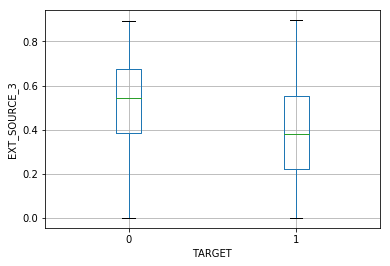

In [10]:
data = app_train.groupby('TARGET')['EXT_SOURCE_3']
data = pd.DataFrame(dict(list(data)))
data.boxplot(showfliers = False)
plt.xlabel('TARGET')
plt.ylabel('EXT_SOURCE_3')
plt.show()   